This Program classifies Images 

In [ ]:
#Import the Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Import and Load the dataset 

from keras.datasets import cifar10

(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

In [ ]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print("x_train shape:" ,x_train.shape)
print("y_train shape:" ,y_train.shape)
print("x_test shape:" ,x_test.shape)
print("y_test shape:" ,y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


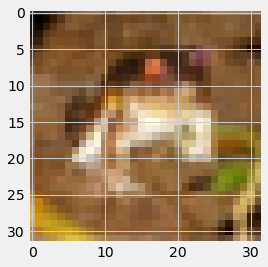

In [ ]:
img=plt.imshow(x_train[0])

In [ ]:
x_train[0]

In [ ]:
x_train=x_train/255

In [ ]:
x_test=x_test/255

In [ ]:
print(y_train[0][0])

6


In [ ]:
classification=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

classification[y_train[0][0]]

'frog'

In [ ]:
y_train=y_train.reshape(-1)
y_test=y_test.reshape(-1)

In [ ]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
def plot_sample(x,y,index):
  plt.imshow(x[index])
  plt.xlabel(classification[y[index]])

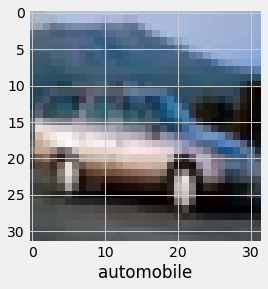

In [ ]:
plot_sample(x_train,y_train,4)

In [ ]:
cnn=Sequential()


cnn.add(Conv2D(64,(3,3),activation='relu', padding='same',input_shape=x_train.shape[1:]))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(32,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(32,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(32,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
# cnn.add(Dropout(0.4))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

In [ ]:
x_train.shape[1:]

(32, 32, 3)

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = cnn.fit(x_train, y_train,validation_split=0.2, epochs=15)

Epoch 1/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6242 - accuracy: 0.3987 - val_loss: 1.3551 - val_accuracy: 0.5128
Epoch 2/15
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2592 - accuracy: 0.5444 - val_loss: 1.2250 - val_accuracy: 0.5540
Epoch 3/15
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1254 - accuracy: 0.5981 - val_loss: 1.1032 - val_accuracy: 0.6073
Epoch 4/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0339 - accuracy: 0.6310 - val_loss: 1.0315 - val_accuracy: 0.6323
Epoch 5/15
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9665 - accuracy: 0.6553 - val_loss: 1.0715 - val_accuracy: 0.6205
Epoch 6/15
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9042 - accuracy: 0.6777 - val_loss: 0.9799 - val_accuracy: 0.6536
Epoch 7/15
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8504 - accuracy: 0.6974 - val_loss: 0.9444 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


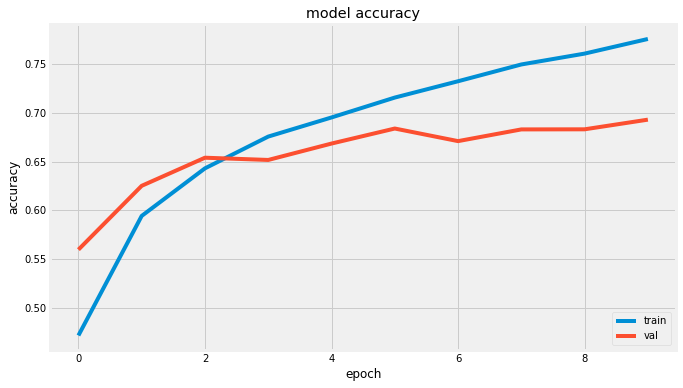

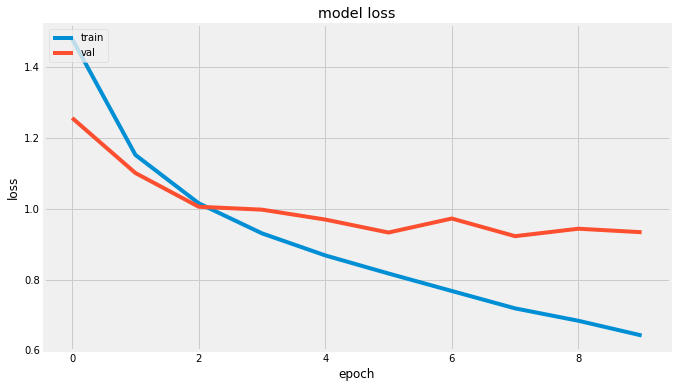

In [ ]:
# list all data in history
print(history.history.keys())
#summarize history for accuracy
fig = plt.figure(figsize = (10,6))
# plt.yticks(range(90,100))
# plt.ylim(0.25, 0.8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
# summarize history for loss

plt.figure(figsize = (10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9416 - accuracy: 0.6860


[0.9415598511695862, 0.6859999895095825]

In [ ]:
y_test[0]

3

In [ ]:
predictions=cnn.predict(x_test)

In [ ]:
predictions[0]

array([6.4627209e-04, 4.1525374e-05, 4.3445323e-03, 7.7685124e-01,
       6.5338582e-04, 2.4012495e-02, 5.9796055e-03, 9.8462465e-07,
       1.8745938e-01, 1.0608584e-05], dtype=float32)

In [ ]:
y_classes= [np.argmax(i) for i in predictions]

In [ ]:
y_pred=[classification[pred] for pred in  y_classes]
y_pred

In [ ]:
y_test1= [classification[test] for test in y_test]
y_test1

In [ ]:
print(y_pred[0],y_test1[0])

cat cat


In [ ]:
from google.colab import files
import cv2

In [ ]:
uploaded=files.upload()

Saving IMG_6033.JPG to IMG_6033.JPG


In [ ]:
uploaded

In [ ]:
def prepare(filepath):
    IMG_SIZE = 32  # 50 in txt-based
    img_array = cv2.imread(filepath)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with shaping that TF wants.

In [ ]:
newimg=prepare('/content/07CAT-STRIPES-superJumbo.jpg')

In [ ]:
newimg.shape

(1, 32, 32, 3)

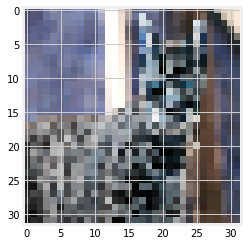

In [ ]:
plt.imshow(newimg.reshape(32,32,3))

In [ ]:
newimg2=prepare('/content/fastest-trucks-lead.jpg')

In [ ]:
classification[np.argmax(cnn.predict(newimg))]

'ship'

In [ ]:
img_array = cv2.imread('/content/fastest-trucks-lead.jpg')

In [ ]:
img_array.shape

(1080, 1920, 3)

In [ ]:
classification[np.argmax(cnn.predict(newimg2))]

'truck'

In [ ]:
/content/07CAT-STRIPES-superJumbo.jpg

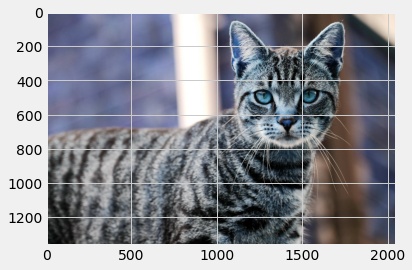

In [ ]:
plt.imshow(img_array.reshape()))

In [ ]:
newimg3=prepare('/content/CRUISE_Charming.jpg')

In [ ]:
classification[np.argmax(cnn.predict(newimg3))]

'airplane'

# New Section